In [2]:
import os
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
def get_tunning_reports(classifier_name: str) -> pd.DataFrame:
    tunning_reports = glob.glob(os.path.join(f"../data/results/{classifier_name}/tunning", "*.csv"))

    df = pd.concat((pd.read_csv(f, index_col=0) for f in tunning_reports), ignore_index=True)
    return df

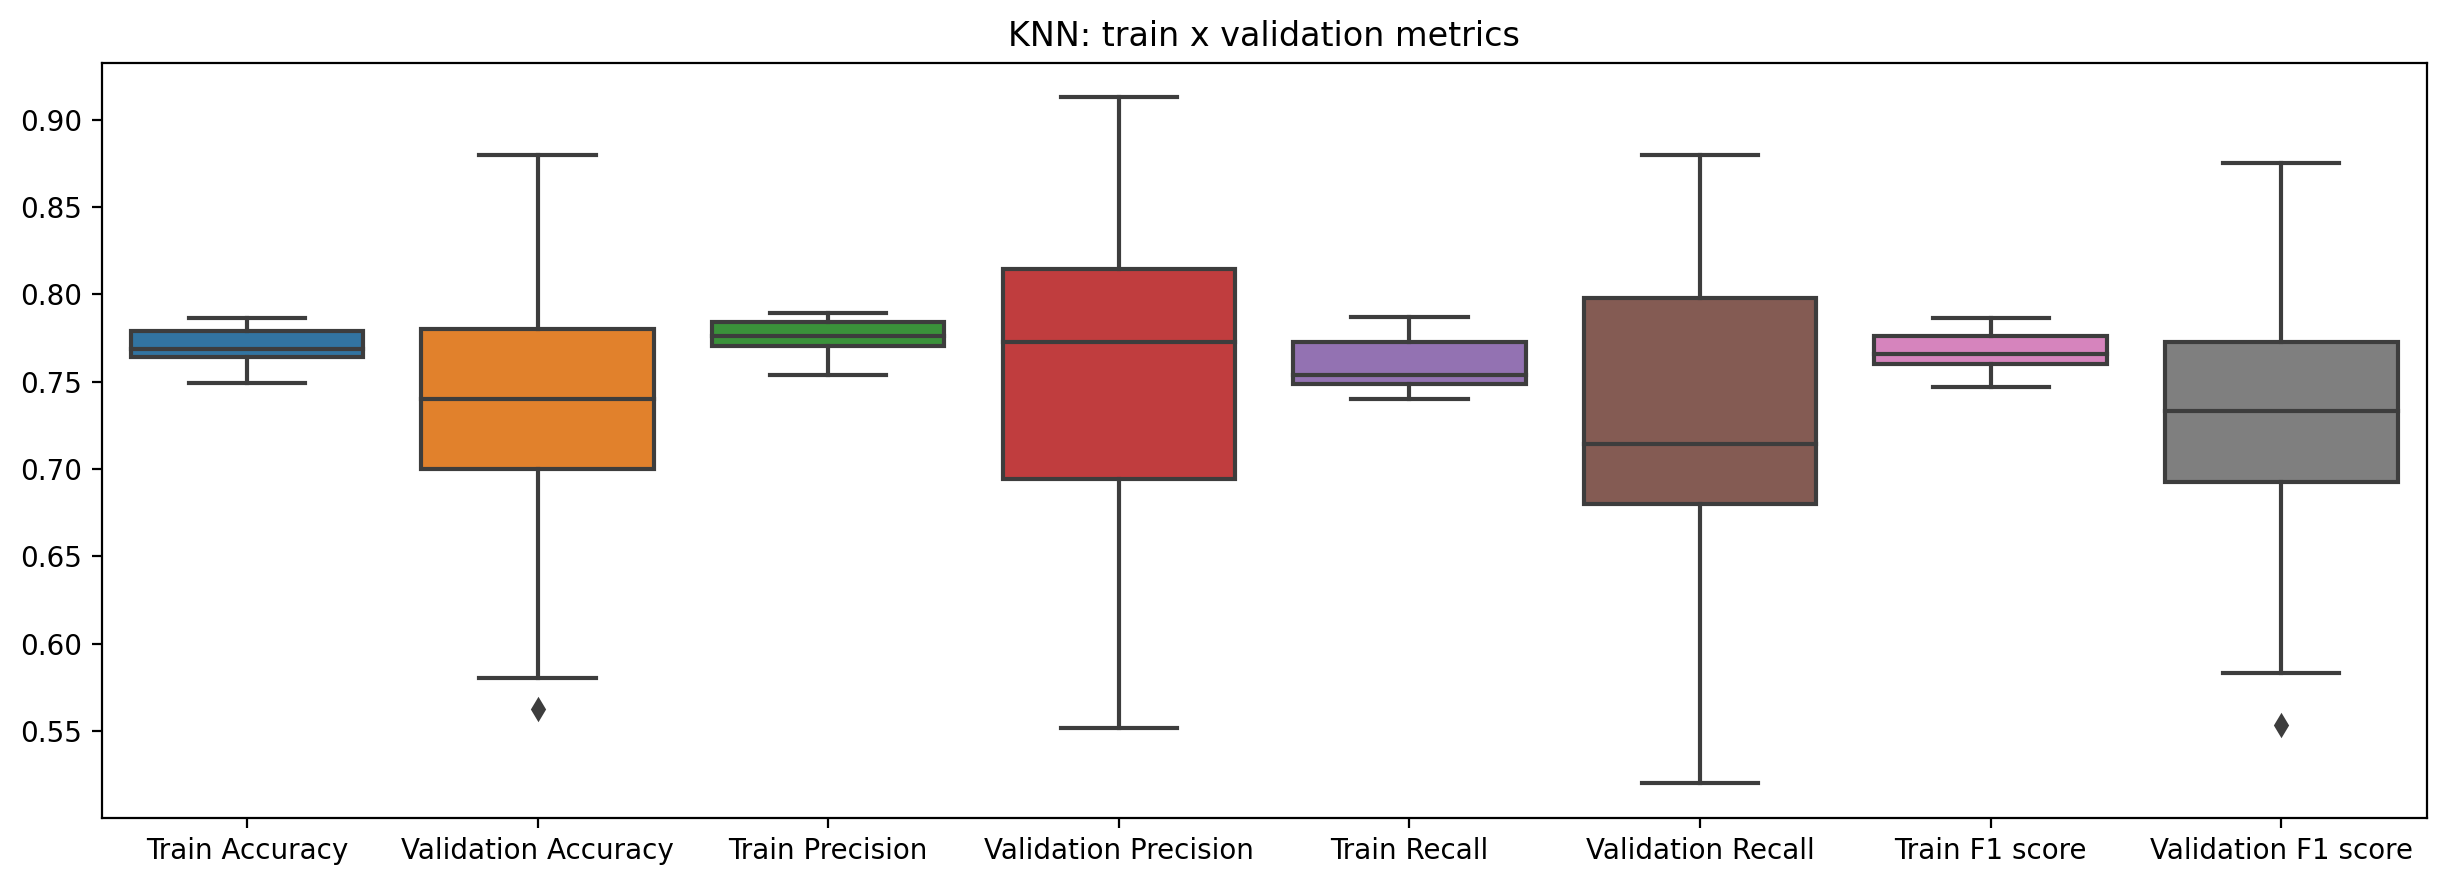

In [47]:
knn = pd.read_csv("../data/results/k-nearest_neighbors/validation.csv", index_col=0)
plt.figure(figsize=(15, 5), dpi=200)
g = sns.boxplot(knn[["train_accuracy", "validation_accuracy",
                     "train_precision", "validation_precision",
                     "train_recall", "validation_recall",
                     "train_f1_score", "validation_f1_score"]])

g.set_xticklabels(["Train Accuracy", "Validation Accuracy",
                     "Train Precision", "Validation Precision",
                     "Train Recall", "Validation Recall",
                     "Train F1 score", "Validation F1 score"])
plt.title("KNN: train x validation metrics")
plt.savefig('../images/k-nearest_neighbors_validation.jpg', bbox_inches='tight');

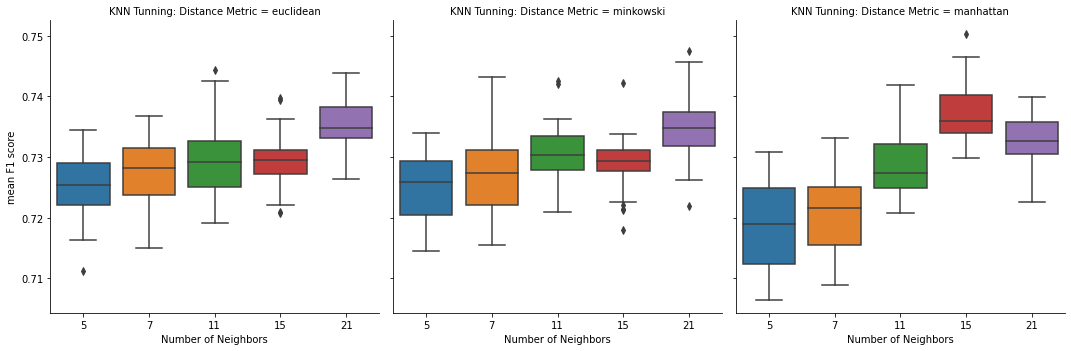

In [41]:
knn_tunning = get_tunning_reports("k-nearest_neighbors")
g = sns.catplot(
    data=knn_tunning, x="n_neighbors", y="f1_mean_score", col="metric",
    kind="box", dodge=False,
)
g.set(xlabel="Number of Neighbors", ylabel="mean F1 score")
g.set_titles("KNN Tunning: Distance Metric = {col_name}")
plt.savefig('../images/k-nearest_neighbors_tunning.jpg', bbox_inches='tight')

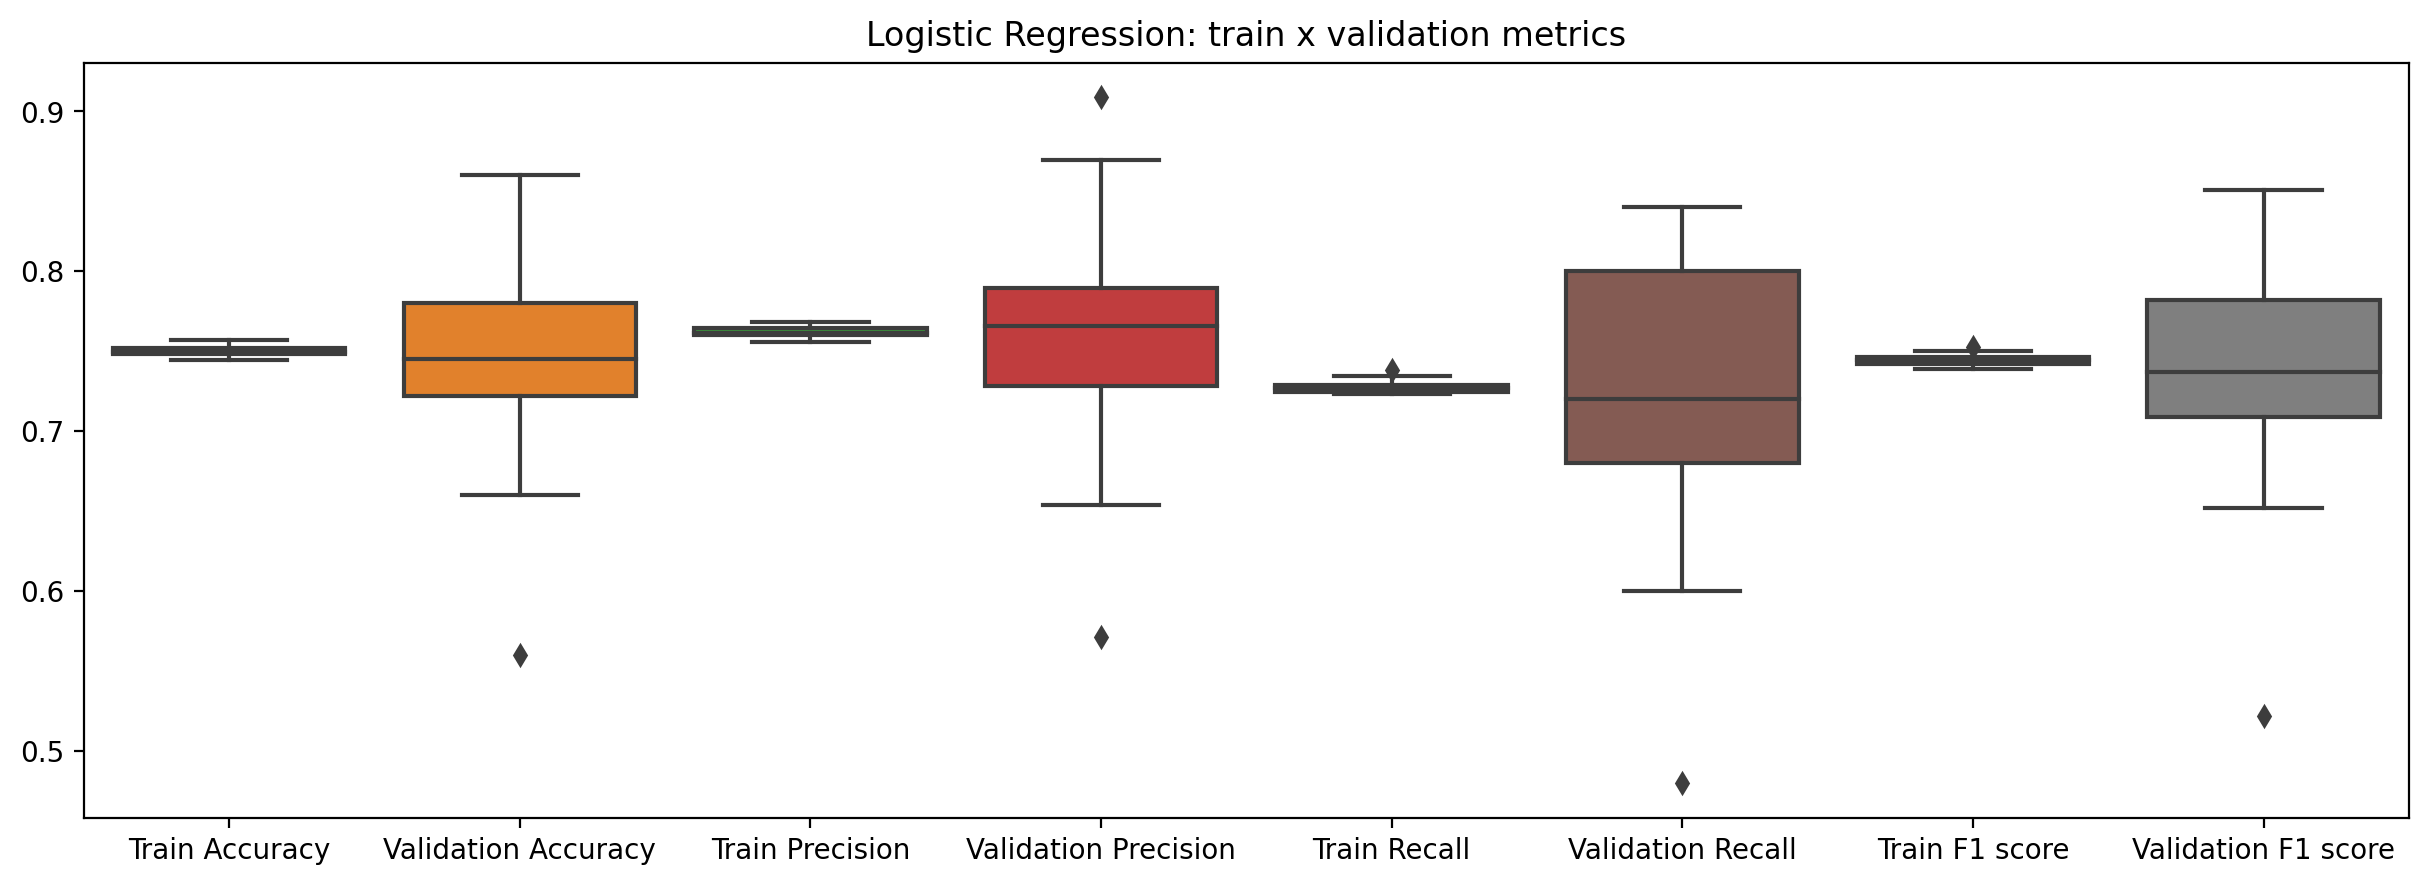

In [49]:
logistic = pd.read_csv("../data/results/logistic_regression/validation.csv", index_col=0)
plt.figure(figsize=(15, 5), dpi=200)
g = sns.boxplot(logistic[["train_accuracy", "validation_accuracy",
                     "train_precision", "validation_precision",
                     "train_recall", "validation_recall",
                     "train_f1_score", "validation_f1_score"]])
g.set_xticklabels(["Train Accuracy", "Validation Accuracy",
                     "Train Precision", "Validation Precision",
                     "Train Recall", "Validation Recall",
                     "Train F1 score", "Validation F1 score"])
plt.title("Logistic Regression: train x validation metrics")
plt.savefig('../images/logistic_regression_validation.jpg', bbox_inches='tight');

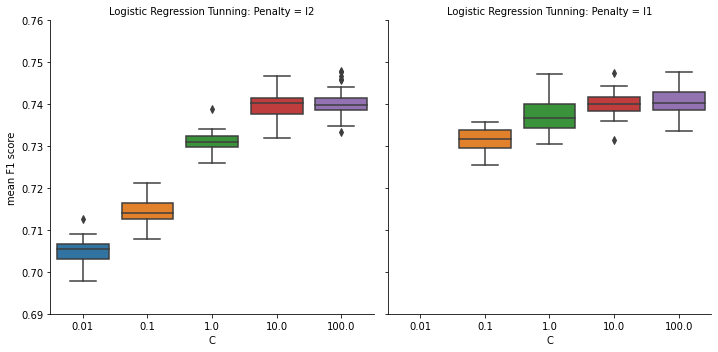

In [50]:
logistic_tunning = get_tunning_reports("logistic_regression")
g = sns.catplot(
    data=logistic_tunning, x="C", y="f1_mean_score", col="penalty",
    kind="box", dodge=False,
)
plt.ylim([0.69,0.76])
g.set(xlabel="C", ylabel="mean F1 score")
g.set_titles("Logistic Regression Tunning: Penalty = {col_name}")
plt.savefig('../images/logistic_regression_tunning.jpg', bbox_inches='tight')

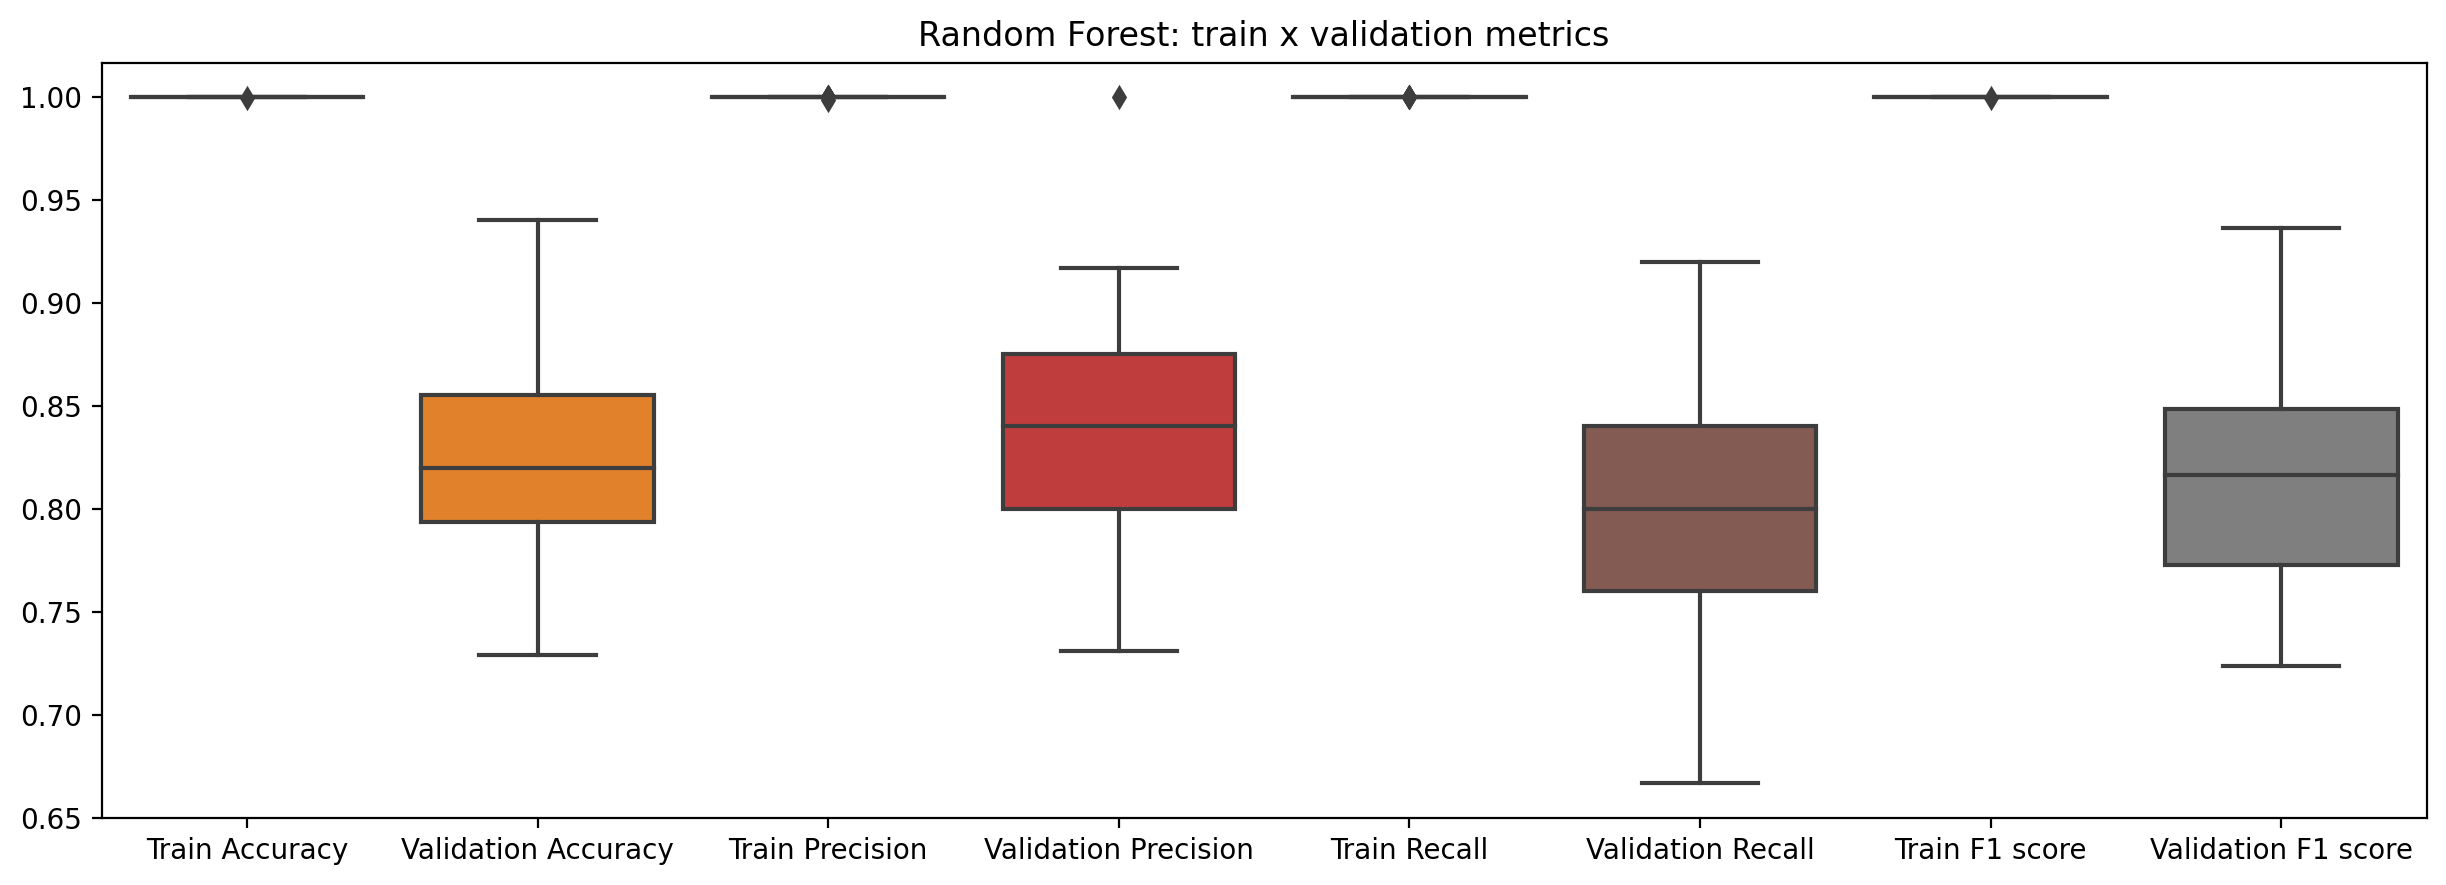

In [51]:
random_forest = pd.read_csv("../data/results/random_forest/validation.csv", index_col=0)
plt.figure(figsize=(15, 5), dpi=200)
g = sns.boxplot(random_forest[["train_accuracy", "validation_accuracy",
                     "train_precision", "validation_precision",
                     "train_recall", "validation_recall",
                     "train_f1_score", "validation_f1_score"]])
g.set_xticklabels(["Train Accuracy", "Validation Accuracy",
                     "Train Precision", "Validation Precision",
                     "Train Recall", "Validation Recall",
                     "Train F1 score", "Validation F1 score"])
plt.title("Random Forest: train x validation metrics")
plt.savefig('../images/random_forest_validation.jpg', bbox_inches='tight');

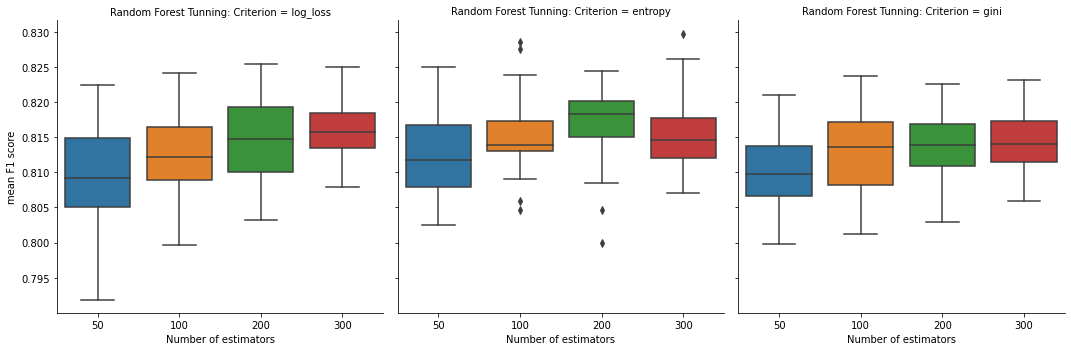

In [52]:
random_forest_tunning = get_tunning_reports("random_forest")
g = sns.catplot(
    data=random_forest_tunning, x="n_estimators", y="f1_mean_score", col="criterion",
    kind="box", dodge=False,
)
g.set(xlabel="Number of estimators", ylabel="mean F1 score")
g.set_titles("Random Forest Tunning: Criterion = {col_name}")
plt.savefig('../images/random_forest_tunning.jpg', bbox_inches='tight')